In [1]:
import matplotlib.pyplot as plt

In [2]:
from temmeta import data_io as dio

In [20]:
import numpy as np

In [3]:
from pystem.stemsegmentation import segmentationSTEM
import time

## Load the dataset from the EMD file

In [4]:
#f = dio.EMDFile("./example_dataset.emd")
f=dio.EMDFile("./SuperX-HAADF-913.emd")

In [8]:
f.print_simple_structure()

------------------------------
        Image datasets        
------------------------------
Dataset number: 0, UUID: 6fdbde41eecc4375b45cd86bd2be17c0, Shape: 256x256, Frames: 240, Data type: uint16, Min:17381, Max:57476
---------------------------------------
        SpectrumStream datasets        
---------------------------------------
Dataset number: 0, UUID: f5a4ba0965a5444b8c46cc420cf7fef0, Length: 15933353, Data type: uint16, 



In [14]:
stack = f.get_dataset("Image", "6fdbde41eecc4375b45cd86bd2be17c0")

In [17]:
stack.data.shape

(240, 256, 256)

In [21]:
image = np.mean(stack.data, axis=0)

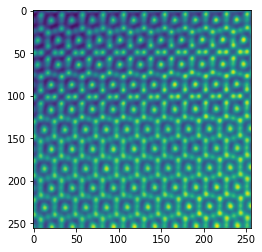

In [22]:
plt.imshow(image)

## Do segmentation on the data

In [23]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM(n_patterns=2,
                       window_x=20,window_y=20,
                       patch_x=20,patch_y=20,
                       step=5,
                       descriptor_name=descriptor_name,
                       #method='direct',
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

method: direct
time_cost:   2.34[s]


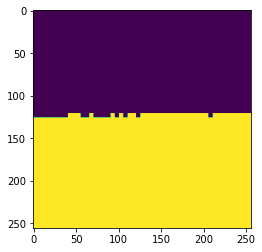

In [24]:
plt.imshow(labels)